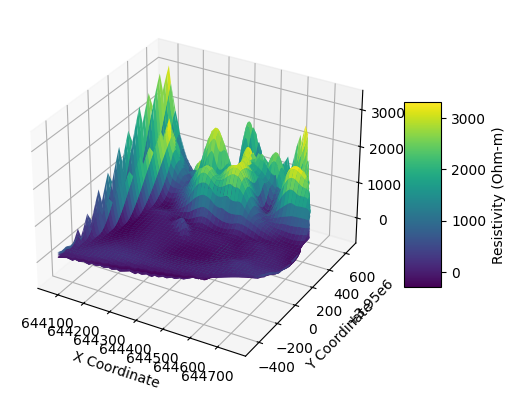

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Load the data from the Excel file
df = pd.read_excel('processed-data.xlsx')

# Define the grid where the interpolation will be done
grid_x, grid_y = np.mgrid[min(df['X']):max(df['X']):100j, min(df['Y']):max(df['Y']):100j]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming each layer is a column in the DataFrame
layers = ['1m', '1.47m', '2.15m', '3.16m', '4.64m',
          '6.81m', '10m', '14.7m', '31.6m', '46.4m', '68.1m', '100m', '147m', '215m', '316m', '464m']

# Variable to store the last plot_surface object for the color bar
surf = None

for layer in layers:
    # Perform the interpolation
    grid_z = griddata((df['X'], df['Y']), df[layer], (grid_x, grid_y), method='cubic')
    
    # Plot the surface for each layer and store the object in surf
    surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', label=layer)

# Adding color bar to show resistivity scale
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Resistivity (Ohm-m)')


# Set labels
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

# Show plot
plt.show()

In [10]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Load the data from the Excel file
df = pd.read_excel('processed-data.xlsx')

# Define the grid where the interpolation will be done
grid_x, grid_y = np.mgrid[min(df['X']):max(df['X']):100j, min(df['Y']):max(df['Y']):100j]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming each layer is a column in the DataFrame
layers = ['1m', '1.47m', '2.15m', '3.16m', '4.64m',
          '6.81m', '10m', '14.7m', '31.6m', '46.4m', '68.1m', '100m', '147m', '215m', '316m', '464m']

# Variable to store the last plot_surface object for the color bar
surf = None

for layer in layers:
    # Perform the interpolation
    grid_z = griddata((df['X'], df['Y']), df[layer], (grid_x, grid_y), method='cubic')
    
    # Plot the surface for each layer and store the object in surf
    surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', label=layer)

# Adding color bar to show resistivity scale
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Resistivity (Ohm-m)')


# Set labels
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

# Show plot
plt.show()

In [11]:
# Annotate each point with its name from the 'Name' column
for i, txt in enumerate(df['name']):
    ax.text(df['X'][i], df['Y'][i], df['Z'][i], txt, size=10, zorder=1, color='k')